In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=15   #if 50,pc gets heated

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

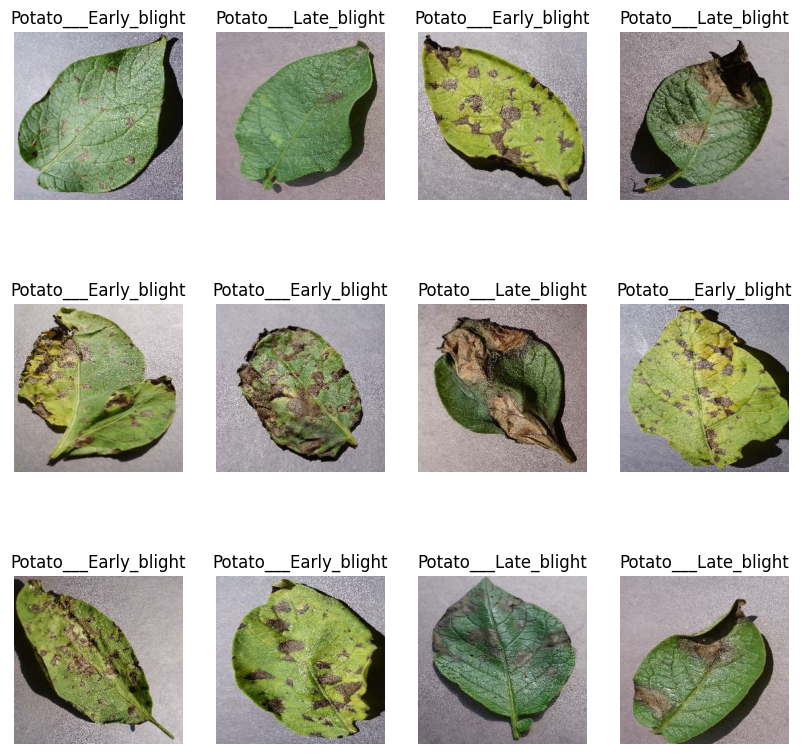

In [6]:
plt.figure(figsize=(10,10))  # increase dimension

for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    #print(image_batch.shape)
    #print(label_batch.numpy())

In [7]:
len(dataset)

68

**80 % ==>training**

**20% ==> 10% validation,10% test**

In [8]:
#train_size=80/100

In [9]:
#tr=(int)(len(dataset)*train_size) #train

In [10]:
#train_ds=dataset.take(tr)
#len(train_ds)

In [11]:
#test_ds=dataset.skip(tr)

In [12]:
#len(test_ds)

In [13]:
#val_size=10/100

In [14]:
#vr=(int)(len(dataset)*val_size)

In [15]:
#val_ds=dataset.take(vr)

In [16]:
#len(val_ds)

In [17]:
#test_ds=test_ds.skip(vr)

In [18]:
#len(test_ds)

In [19]:
def get_dataset_partitions_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    train_size=train_split
    val_size=val_split
    test_size=test_split
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
        
    tr=(int)(len(dataset)*train_size)
    train_ds=dataset.take(tr)
    test_ds=dataset.skip(tr)
    vr=(int)(len(dataset)*val_size)
    val_ds=dataset.take(vr)
    test_ds=test_ds.skip(vr)
    return train_ds,val_ds,test_ds

In [20]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

54

In [22]:
len(val_ds)

6

In [23]:
len(test_ds)

8

**Optimization**

In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#cache- this will read the image fromthe disk and for next iteration it will keep the image in memory
#prefetch-if gpu is busy training it will load next
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**preprocessing**

In [25]:
resize_and_rescale=tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [27]:
input1=(IMAGE_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input1),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
    
    
])

model.build(input_shape=input1)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 256, 3)        0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 256, 3)        0         
                                                                 
 conv2d (Conv2D)             (256, 254, 254, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (256, 127, 127, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (256, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (256, 62, 62, 64)         0         
 g2D)                                                 

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history=model.fit(
  train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
54/54 [==============================] - 143s 2s/step - loss: 0.8825 - accuracy: 0.5191 - val_loss: 0.7872 - val_accuracy: 0.5521
Epoch 2/15
54/54 [==============================] - 106s 2s/step - loss: 0.7026 - accuracy: 0.6852 - val_loss: 0.5647 - val_accuracy: 0.6979
Epoch 3/15
54/54 [==============================] - 258s 5s/step - loss: 0.4345 - accuracy: 0.8281 - val_loss: 0.3576 - val_accuracy: 0.8698
Epoch 4/15
54/54 [==============================] - 231s 4s/step - loss: 0.3385 - accuracy: 0.8704 - val_loss: 0.4622 - val_accuracy: 0.8021
Epoch 5/15
54/54 [==============================] - 230s 4s/step - loss: 0.3443 - accuracy: 0.8565 - val_loss: 0.1992 - val_accuracy: 0.9479
Epoch 6/15
54/54 [==============================] - 228s 4s/step - loss: 0.2446 - accuracy: 0.9057 - val_loss: 0.1538 - val_accuracy: 0.9323
Epoch 7/15
54/54 [==============================] - 213s 4s/step - loss: 0.1787 - accuracy: 0.9277 - val_loss: 0.1895 - val_accuracy: 0.9271
Epoch 8/15
54

In [31]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 14s 1s/step - loss: 0.4358 - accuracy: 0.8750


In [32]:
scores

[0.4358208179473877, 0.875]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history.history['accuracy']
len(history.history['accuracy'])

15

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

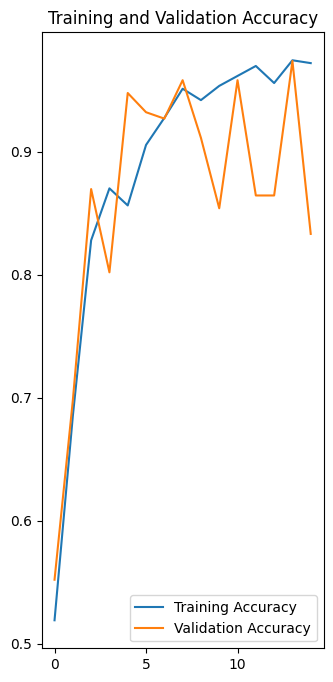

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

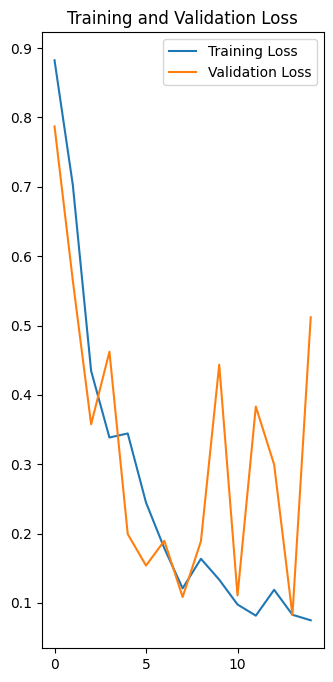

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
import numpy as np

first image to predict
actual label :  Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label :  Potato___Late_blight


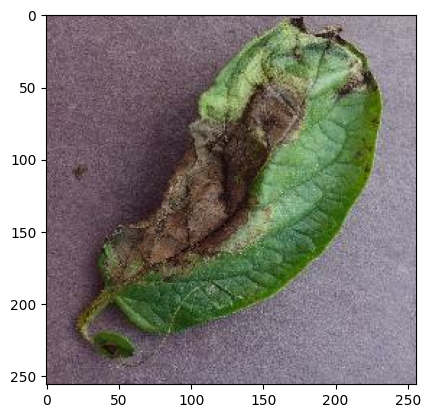

In [41]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label : ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label : ",class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)  #create batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]   
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence
    

1/1 [==============================] - 0s 136ms/step


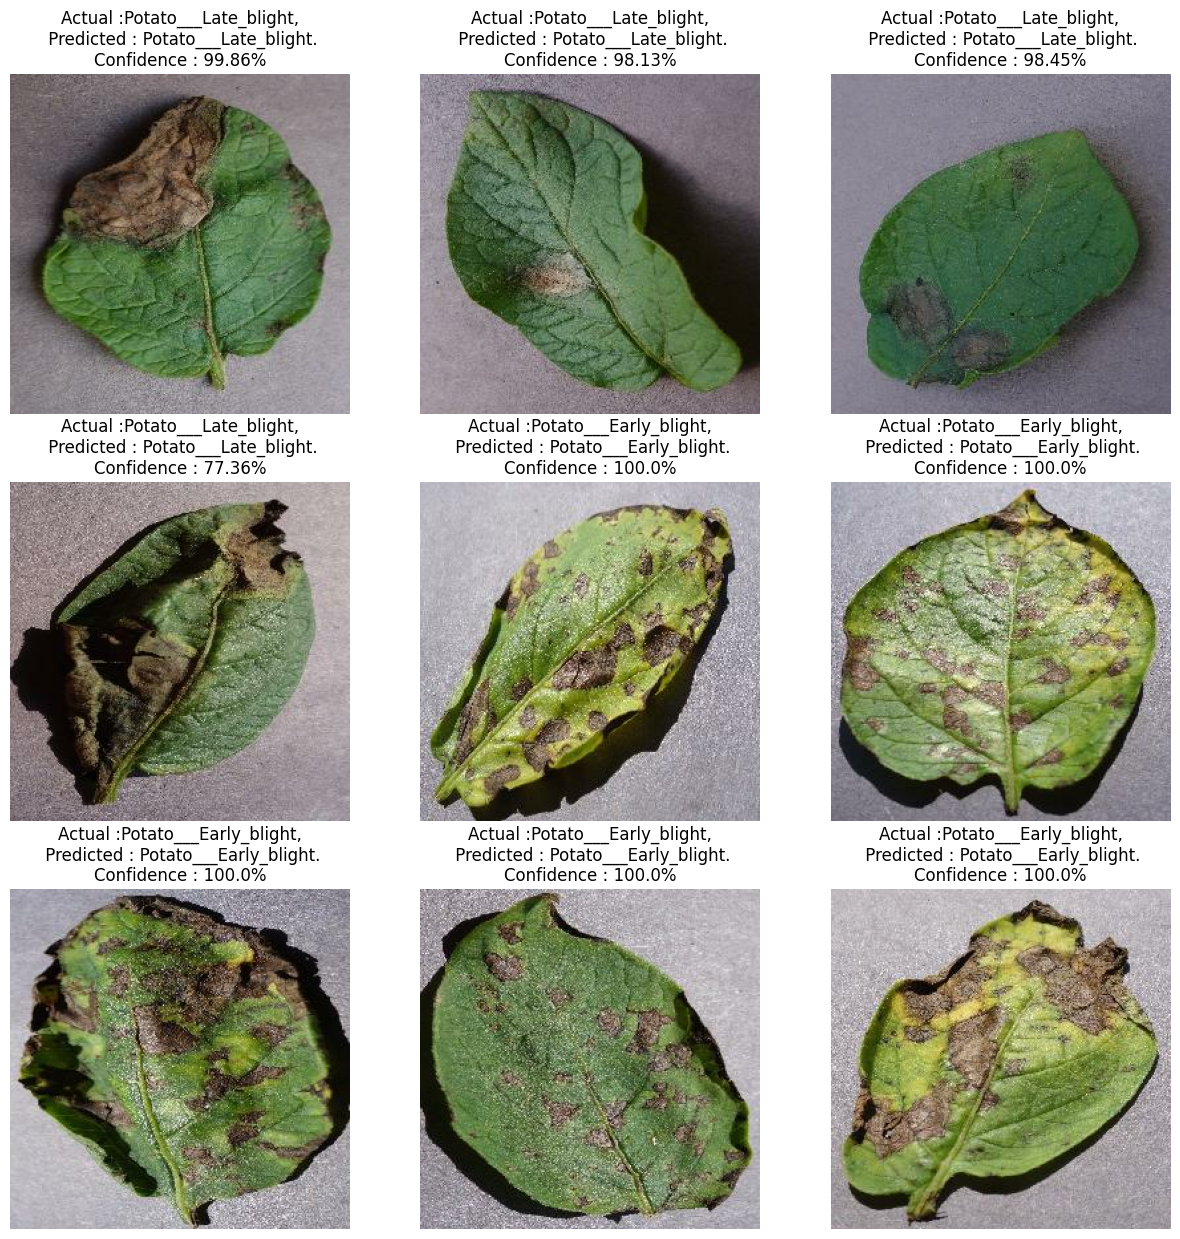

In [43]:
plt.figure(figsize=(15,15))

for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual :{actual_class},\n Predicted : {predicted_class}.\nConfidence : {confidence}%")
        plt.axis("off")

In [44]:
import os
model_version = max([int(i) for i in os.listdir("../saved_models")+[0]])+1
model.save(f"../saved_models/{model_version}")
# model_version=5
# model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/8\assets


INFO:tensorflow:Assets written to: ../saved_models/8\assets


In [45]:
import numpy as np
import tensorflow as tf

In [46]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(f"../saved_models/{model_version}")
tflite_model = converter.convert()

In [47]:
# Save the TFLite model
with open(f"../tflite/{model_version}.tflite", "wb") as f:
    f.write(tflite_model)

In [48]:
# # Load the TFLite model
# interpreter = tf.lite.Interpreter(model_content=tflite_model)
# interpreter.allocate_tensors()

# # Get input and output tensors
# input_tensor_index = interpreter.get_input_details()[0]['index']
# output = interpreter.tensor(interpreter.get_output_details()[0]['index'])

# # Evaluate the TFLite model on the test dataset
# correct_predictions = 0
# total_samples = 0

# for images, labels in test_ds:
#     for i in range(len(images)):
#         # Preprocess the input image
#         input_image = images[i].numpy().astype(np.float32)
#         input_image = (input_image / 255.0).reshape(1, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

#         # Set the input tensor values
#         interpreter.set_tensor(input_tensor_index, input_image)

#         # Run inference
#         interpreter.invoke()

#         # Get the model predictions
#         predictions = output()[0]
#         predicted_class = np.argmax(predictions)

#         # Compare with ground truth labels
#         true_label = labels[i].numpy()
#         correct_predictions += int(predicted_class == true_label)
#         total_samples += 1

# # Calculate accuracy
# accuracy = correct_predictions / total_samples
# print(f'TFLite Model Accuracy: {accuracy * 100:.2f}%')


In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # create batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence


In [51]:
new_image_path = "C:\\Users\\hp\\Music\\Mini-Project\\training\\PlantVillage\\Potato___Late_blight\\lateblight.JPG"
new_image = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = tf.keras.preprocessing.image.img_to_array(new_image)

predicted_class, confidence = predict(model, img_array)

print("Predicted class:", predicted_class)
print("Confidence:", confidence, "%")


1/1 [==============================] - 0s 112ms/step
Predicted class: Potato___Early_blight
Confidence: 80.88 %


In [55]:
new_image_path = 'C:\\Users\\hp\\Music\\Mini-Project\\training\\PlantVillage\\Potato___Late_blight\\lateblight.JPG'
new_image = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = tf.keras.preprocessing.image.img_to_array(new_image)

predicted_class, confidence = predict(model, img_array)

print("Predicted class:", predicted_class)
print("Confidence:", confidence, "%")


1/1 [==============================] - 0s 124ms/step
Predicted class: Potato___Early_blight
Confidence: 80.88 %


In [56]:
# Evaluate the model on the test dataset
test_results = model.evaluate(test_ds)

# Print the overall accuracy
print("Overall Accuracy on Test Dataset:", test_results[1])

8/8 [==============================] - 9s 1s/step - loss: 0.4358 - accuracy: 0.8750
Overall Accuracy on Test Dataset: 0.875


In [57]:
from sklearn.metrics import classification_report


# Evaluate the model on the test dataset
test_results = model.evaluate(test_ds)

# Get predictions for the test dataset
y_pred = model.predict(test_ds)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Print the overall accuracy from model.evaluate
print("Overall Accuracy from model.evaluate:", test_results[1])


8/8 [==============================] - 9s 1s/step
Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.48      0.60      0.53       121
 Potato___Late_blight       0.46      0.34      0.39       121
     Potato___healthy       0.13      0.14      0.14        14

             accuracy                           0.45       256
            macro avg       0.36      0.36      0.35       256
         weighted avg       0.45      0.45      0.44       256

Overall Accuracy from model.evaluate: 0.875
